# Comparaison de différentes méthodes de machine learning sur 3 jeux de données différents. 

Thomas Renne

Code des différents modèles de classification disponible sur [GitHub][https://github.com/RudolphDev/machine_learning]

In [1]:
import numpy as np
from tr_functions.general import GeneralModel
from tr_functions.gaussian import GaussianModel
from tr_functions.kppv import KppvModel
from tr_functions.parzen import ParzenModel
from tr_functions.linear import LinearSeparationModel
from tr_functions.bagging import BaggingModel
from tr_functions.scikit_functions import *

In [2]:
split_data_tp1_app = GeneralModel.open_file('data/data_tp1_app.txt')
split_data_tp1_dec = GeneralModel.open_file('data/data_tp1_dec.txt')

split_data_tp2_app = GeneralModel.open_file('data/data_tp2_app.txt')
split_data_tp2_dec = GeneralModel.open_file('data/data_tp2_dec.txt')

split_data_tp3_app = GeneralModel.open_file('data/data_tp3_app.txt')
split_data_tp3_dec = GeneralModel.open_file('data/data_tp3_dec.txt')

# Analyse visuelle
### Dataset 1

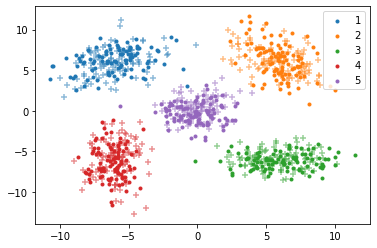

In [3]:
general = GeneralModel()
general.train_data = split_data_tp1_app
general.test_data = split_data_tp1_dec
general.plot_all_data()

On remarque que les jeux de données d'apprentissage (croix plus claires) et de test (points sombres) se superposent relativement bien a l'exception de quelques outliers dans chaque classe. Normalement les différents modèles devraient séparer les classes avec une bon niveau de confiance. Dans cet exemple, la séparation des classes peut se faire manuellement. 

### Dataset 2

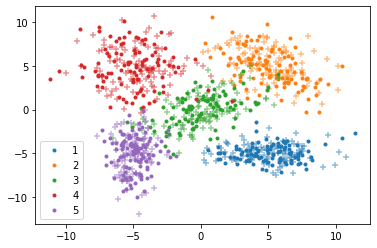

In [4]:
general = GeneralModel()
general.train_data = split_data_tp2_app
general.test_data = split_data_tp2_dec
general.plot_all_data()

Contrairement au premier jeu de données, les classes semblent plus diffusent que ce soit pour les jeux d'apprentissage et de test. En revanche on remarque que les classes sont constante entre les deux jeux de données. Les résultats des différents modèles seront moins bon que pour le premier jeu. La séparation des classes peut se faire manuellement avec quelques difficultés.

### Dataset 3

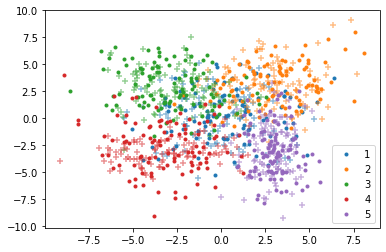

In [5]:
general = GeneralModel()
general.train_data = split_data_tp3_app
general.test_data = split_data_tp3_dec
general.plot_all_data()

Ce troisième jeu de données est totalement mélangé. Visuellement on ne peut pas distinguer de classes. En revanche comme pour les deux précédents jeux on remarque les classes d'apprentissage et de tests se supperposent bien. Dans ce cas précis une analyse manuelle est impossible. Il est probable que ce jeu de données donne les moins bon résultats pour les différents modèles. 

# Estimation gaussienne (euclidienne)

### Dataset 1

Gaussian model created
Classes centers created
Class = 1 has a center = [-6.10093065, 5.99640958]
Class = 2 has a center = [5.79953605, 6.171171379999997]
Class = 3 has a center = [5.776998600000001, -5.925827230000001]
Class = 4 has a center = [-5.924998090000001, -6.013923480000001]
Class = 5 has a center = [-0.013581480000000043, 0.2513897700000001]


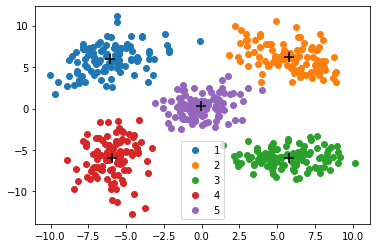

Results :
----------------

Top results :
----------------
Top 1 rate :  0.992
Top 2 rate :  1.0
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  98 │   0 │   0 │   0 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │ 100 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │  99 │   1 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   0 │ 100 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   1 │   0 │   0 │   0 │  99 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


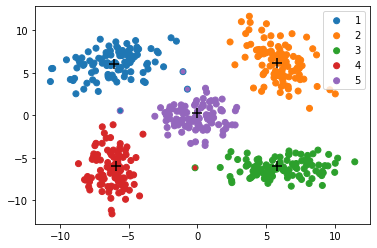

In [6]:
gaussian_model = GaussianModel()
gaussian_model.gaussian_fit_model(split_data_tp1_app)
gaussian_model.print_classes_centers()
gaussian_model.plot_train_data()
gaussian_model.compute_method = "euclidian"
gaussian_model.test_model(split_data_tp1_dec)
gaussian_model.print_model_result()
gaussian_model.plot_test_data()


L'analyse du jeu de données d'apprentissage avec la position de chaque classe représenté en par les croix noires montre une répartition bien visible. L'analyse du jeux de test montre un taux de Top 1 de 99,2% et de Top 2 de 100%. On peut donc en déduire que la méthode de l'estimation gaussienne avec distance euclidienne prédit de manière efficace les classes. Sur les 500 classes à prédire 496 sont bien classés.
Le deuxième graphique représente le jeu de données tests avec les classes en croix noires. Les couleurs des points représentent les classes prédites et les contours représentent les classes théoriques. On remarque que les 4 classes mal placées sont des classes qui peuvent être considéré comme des outliers, car posisitionné entre deux groupes de classes. 

### Dataset 2

Gaussian model created
Classes centers created
Class = 1 has a center = [4.884009160000003, -4.993250990000002]
Class = 2 has a center = [5.021350009999999, 5.22781893]
Class = 3 has a center = [0.03402201000000008, -0.16684774000000008]
Class = 4 has a center = [-4.679924409999999, 4.945550710000001]
Class = 5 has a center = [-4.977598800000001, -5.127728420000003]


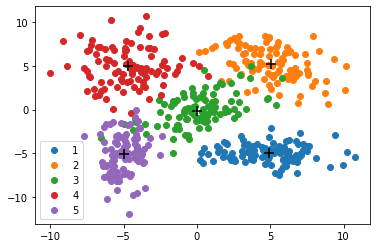

Results :
----------------

Top results :
----------------
Top 1 rate :  0.946
Top 2 rate :  0.996
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │ 100 │   0 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   2 │  97 │   1 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   5 │  84 │   1 │  10 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   6 │  94 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   2 │   0 │  98 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


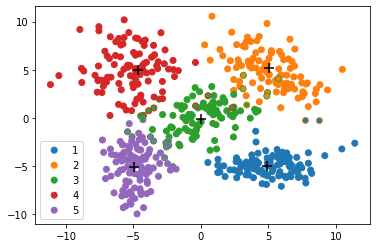

In [7]:
gaussian_model = GaussianModel()
gaussian_model.gaussian_fit_model(split_data_tp2_app)
gaussian_model.print_classes_centers()
gaussian_model.plot_train_data()
gaussian_model.compute_method = "euclidian"
gaussian_model.test_model(split_data_tp2_dec)
gaussian_model.print_model_result()
gaussian_model.plot_test_data()

Comme précédement on remarque que les centres de classes sont bien positionnés par rapport aux classes. Comparé au précédent dataset les résultats sont un peu moins bon avec seulement 94% en Top 1. Lorsque l'on regarde la matrice de confusion on remarque que la classe numéro 3 est la classe la moins bien classée. En analysant le graphique on remarque la classe 3 (verte) a de nombreux points proche des centres de classes 5 et 2. De plus on remarque que les 6 points mal classés de la classe 4 sont placé dans la classe 3. La méthode est donc un peu moins bonne lorsque les données se chevauchent.  

### Dataset 3

Gaussian model created
Classes centers created
Class = 1 has a center = [-0.18975552999999987, 0.16551614999999997]
Class = 2 has a center = [2.8317632400000003, 3.1425455499999995]
Class = 3 has a center = [-2.743207609999999, 2.7806047900000017]
Class = 4 has a center = [-3.0896952, -3.1509188299999993]
Class = 5 has a center = [2.9589284900000004, -2.8782988199999995]


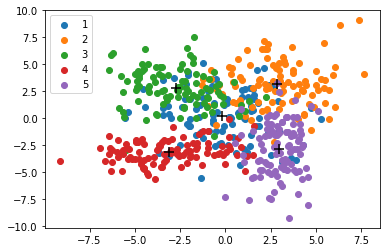

Results :
----------------

Top results :
----------------
Top 1 rate :  0.728
Top 2 rate :  0.892
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  43 │  17 │  16 │  12 │  12 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │  12 │  83 │   3 │   0 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │  16 │   4 │  78 │   2 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │  16 │   0 │   7 │  74 │   3 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   5 │   9 │   0 │   0 │  86 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


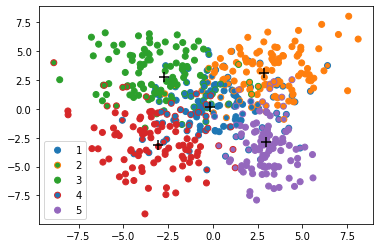

In [8]:
gaussian_model = GaussianModel()
gaussian_model.gaussian_fit_model(split_data_tp3_app)
gaussian_model.print_classes_centers()
gaussian_model.plot_train_data()
gaussian_model.compute_method = "euclidian"
gaussian_model.test_model(split_data_tp3_dec)
gaussian_model.print_model_result()
gaussian_model.plot_test_data()

Pour le dataset 3 on remarque que les différentes classes sont mélangé car les plages de valeurs sont plus larges. Le résultat en Top 1 est de seulement 73%, et le Top 2 ne monte qu'à 89% soit moins que les deux autres datasets. Lorsque l'on étudie la matrice de confusion, on remarque que la classe la moins bien classé avec seulement 43% de bon est la classe 1. En comparant avec le graphique on remarque que la classe 1 est au centre des quatre autres. Donc ces points ce mélange avec ces classes, comme on peut le voir dans la matrice. Les résultats des autres classes sont meilleurs car elles ont de nombreux points à l'extérieur des classes, donc sans ambiguité. 

## Distance de mahalanobis

Dataset 1:
Gaussian model created
Classes centers created
Class = 1 has a center = [-6.10093065, 5.99640958]
Class = 2 has a center = [5.79953605, 6.171171379999997]
Class = 3 has a center = [5.776998600000001, -5.925827230000001]
Class = 4 has a center = [-5.924998090000001, -6.013923480000001]
Class = 5 has a center = [-0.013581480000000043, 0.2513897700000001]


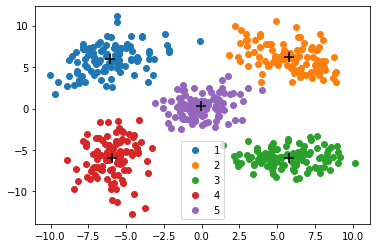

Results :
----------------

Top results :
----------------
Top 1 rate :  0.992
Top 2 rate :  1.0
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  98 │   0 │   0 │   0 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │ 100 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │  99 │   1 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   0 │ 100 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   1 │   0 │   0 │   0 │  99 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


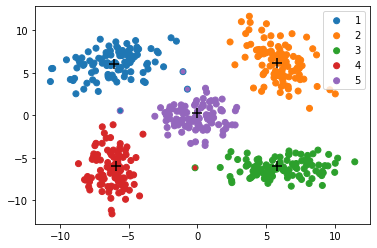

In [9]:
print("Dataset 1:")
gaussian_model = GaussianModel()
gaussian_model.gaussian_fit_model(split_data_tp1_app)
gaussian_model.print_classes_centers()
gaussian_model.plot_train_data()
gaussian_model.compute_method = "mahalanobis"
gaussian_model.test_model(split_data_tp1_dec)
gaussian_model.print_model_result()
gaussian_model.plot_test_data()

Dataset 2:
Gaussian model created
Classes centers created
Class = 1 has a center = [4.884009160000003, -4.993250990000002]
Class = 2 has a center = [5.021350009999999, 5.22781893]
Class = 3 has a center = [0.03402201000000008, -0.16684774000000008]
Class = 4 has a center = [-4.679924409999999, 4.945550710000001]
Class = 5 has a center = [-4.977598800000001, -5.127728420000003]


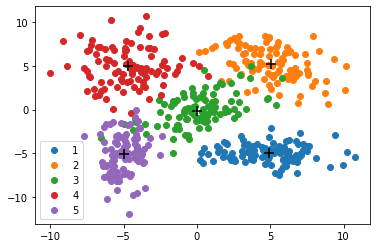

Results :
----------------

Top results :
----------------
Top 1 rate :  0.946
Top 2 rate :  0.996
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │ 100 │   0 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   2 │  97 │   1 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   5 │  84 │   1 │  10 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   6 │  94 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   2 │   0 │  98 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


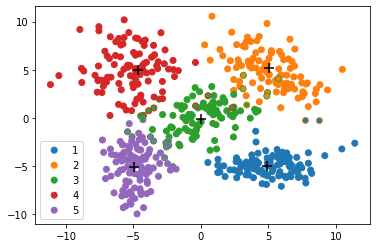

In [10]:
print("Dataset 2:")
gaussian_model = GaussianModel()
gaussian_model.gaussian_fit_model(split_data_tp2_app)
gaussian_model.print_classes_centers()
gaussian_model.plot_train_data()
gaussian_model.compute_method = "mahalanobis"
gaussian_model.test_model(split_data_tp2_dec)
gaussian_model.print_model_result()
gaussian_model.plot_test_data()

Dataset 3:
Gaussian model created
Classes centers created
Class = 1 has a center = [-0.18975552999999987, 0.16551614999999997]
Class = 2 has a center = [2.8317632400000003, 3.1425455499999995]
Class = 3 has a center = [-2.743207609999999, 2.7806047900000017]
Class = 4 has a center = [-3.0896952, -3.1509188299999993]
Class = 5 has a center = [2.9589284900000004, -2.8782988199999995]


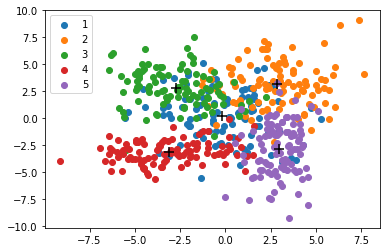

Results :
----------------

Top results :
----------------
Top 1 rate :  0.728
Top 2 rate :  0.894
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  43 │  17 │  16 │  12 │  12 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │  12 │  83 │   3 │   0 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │  16 │   4 │  78 │   2 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │  16 │   0 │   7 │  74 │   3 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   5 │   9 │   0 │   0 │  86 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


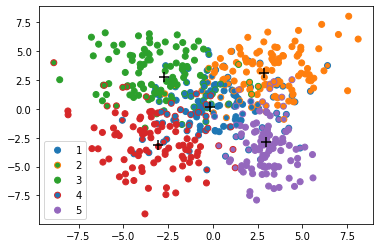

In [11]:
print("Dataset 3:")
gaussian_model = GaussianModel()
gaussian_model.gaussian_fit_model(split_data_tp3_app)
gaussian_model.print_classes_centers()
gaussian_model.plot_train_data()
gaussian_model.compute_method = "mahalanobis"
gaussian_model.test_model(split_data_tp3_dec)
gaussian_model.print_model_result()
gaussian_model.plot_test_data()

La deuxième analyse réalisée sur les 3 datasets avec l'utilisation de la distance de Mahalanobis n'améliore pas les résultats de Top 1 et un tout petit peu ceux de Top 2 pour le dataset numéro 3. Donc utiliser une distance de Mahalanobis peu être recommandé pour des données moins bien discriminé. Et couplé avec une méthode de bagging. 

## Comparaison avec scikit learn


In [12]:
from sklearn.gaussian_process import GaussianProcessClassifier

x_train, y_train, x_test, y_test = create_train_test_data_format_scikit(split_data_tp1_app, split_data_tp1_dec)
gpc1 = GaussianProcessClassifier()
gpc1.fit(x_train, y_train)
score = gpc1.score(x_test, y_test)
print("Score dataset 1:")
print(score)

x_train, y_train, x_test, y_test = create_train_test_data_format_scikit(split_data_tp2_app, split_data_tp2_dec)
gpc2 = GaussianProcessClassifier()
gpc2.fit(x_train, y_train)
score = gpc2.score(x_test, y_test)
print("Score dataset 2:")
print(score)

x_train, y_train, x_test, y_test = create_train_test_data_format_scikit(split_data_tp3_app, split_data_tp3_dec)
gpc3 = GaussianProcessClassifier()
gpc3.fit(x_train, y_train)
score = gpc3.score(x_test, y_test)
print("Score dataset 3:")
print(score)


Score dataset 1:
0.996
Score dataset 2:
0.952
Score dataset 3:
0.71


Les résultats obtenus avec la classification par Processus gaussien de scikit learn donne des résultats de Top 1 similaire à ceux obtenu avec notre méthode.

# K plus proches voisins

## Analyse à 1ppv

### Dataset 1

Will use k = 1 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.992
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  99 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │ 100 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   0 │ 100 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   1 │   1 │  98 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


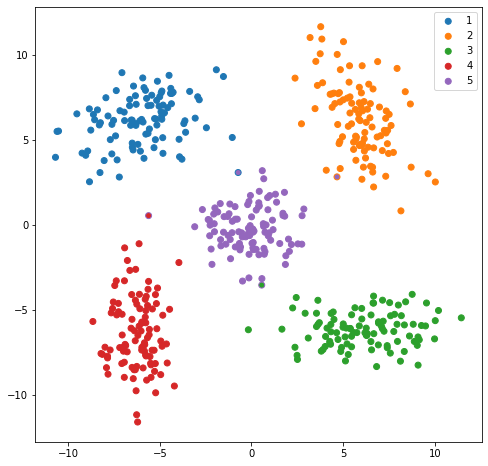

In [13]:
kppv = KppvModel()
kppv.k = 1
kppv.vote_method = "unanimous"
kppv.compute_kppv(split_data_tp1_app, split_data_tp1_dec)
kppv.print_model_result()
kppv.plot_test_data()

L'analyse par kppv à 1 voisin, montre un bon taux de classement pour le premier jeu de données. En effet on remarque que le taux de bonne classification est de 99%. La matrice de confusion montre que 4 valeurs on été mal classées. Le graphique indique que ces 4 valeurs ont des positions ambigues entre deux classes. 

### Dataset 2

Will use k = 1 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.92
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │ 100 │   0 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  89 │  11 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   2 │   4 │  83 │   2 │   9 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   3 │  96 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   7 │   1 │  92 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


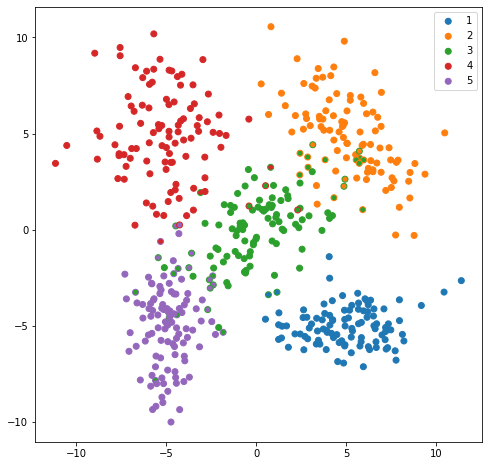

In [14]:
kppv = KppvModel()
kppv.k = 1
kppv.vote_method = "unanimous"
kppv.compute_kppv(split_data_tp2_app, split_data_tp2_dec)
kppv.print_model_result()
kppv.plot_test_data()

Les résultats de classifications avec un 1 plus proche voisin montre un taux de bonne classification moins bon que celui du dataset 1 et aussi moins bon qu'avec la methode d'estimation gaussienne (92% de top 1 contre 94% avec l'estimation). Comme pour la précédente méthode, la classe la moins bien classé est la 3. Donc un plus proche voisin ne permet pas distinguer les points se trouvant plus vers d'autres classes, comme le montre le graphique de résultats de tests.

### Dataset 3

Will use k = 1 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.646
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  34 │  20 │  19 │  14 │  13 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │  14 │  76 │   4 │   1 │   5 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │  24 │   4 │  71 │   1 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │  19 │   2 │  12 │  65 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │  15 │   7 │   1 │   0 │  77 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


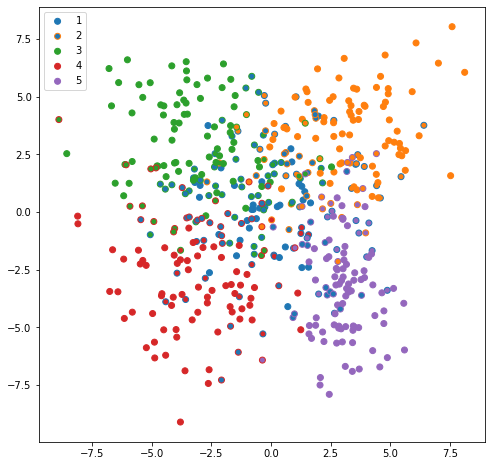

In [15]:
kppv = KppvModel()
kppv.k = 1
kppv.vote_method = "unanimous"
kppv.compute_kppv(split_data_tp3_app, split_data_tp3_dec)
kppv.print_model_result()
kppv.plot_test_data()

La classification du troisième dataset avec un plus proche voisin est mauvaise. En effet seul 65% des points sont bien classés. Ce résultat est moins bon que celui de l'estimation gaussienne (73%). Comme pour cette méthode la classe la moins classé est la classe 1. Cette classe est centrale donc tout les points se mélangent en partie avec les autres. 

## kppv avec cross-validation

Nous allons maintenant essayer de trouver le meilleur K possible pour chaque dataset par cross-validation. Un fois ce k trouvé, on va l'utiliser avec le jeu de données de test. Et voir si un K > 1 améliore le taux de bonne classification. Pour cela nous allons comparer deux méthodes pour chaque jeux de données, un vote à la majorité et à l'unanimité.

### Dataset 1

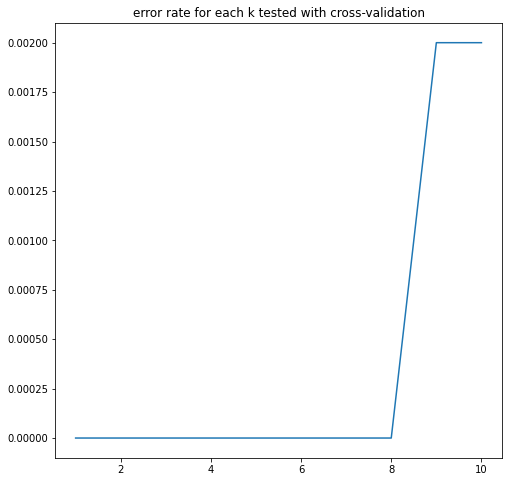

The best k found is 1 with a error rate = 0.0
Will use k = 1 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.992
Top 2 rate :  0.992
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  99 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │ 100 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   0 │ 100 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   1 │   1 │  98 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


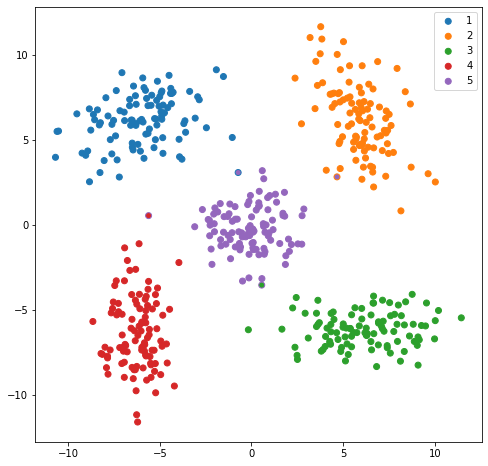

In [43]:
kppv = KppvModel()
kppv.vote_method = "majority"
kppv.get_k_cross_validation(split_data_tp1_app, 10, 5)
kppv.compute_kppv(split_data_tp1_app, split_data_tp1_dec)
kppv.print_model_result()
kppv.plot_test_data()

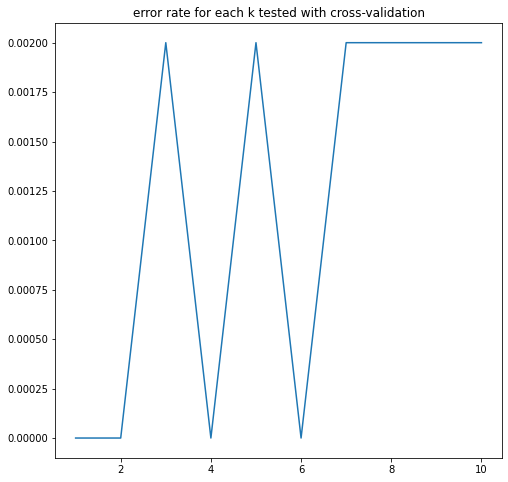

The best k found is 1 with a error rate = 0.0
Will use k = 1 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.992
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  99 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │ 100 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   0 │ 100 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   1 │   1 │  98 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


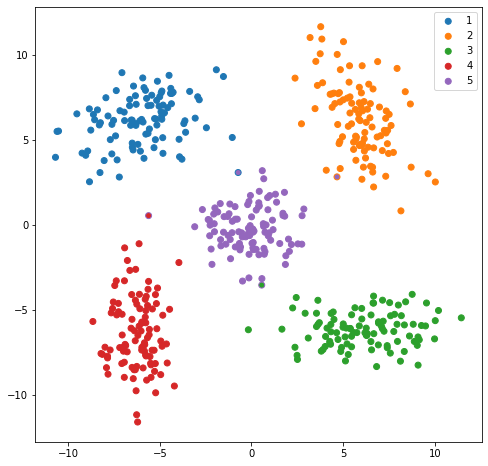

In [17]:
kppv = KppvModel()
kppv.vote_method = "unanimous"
kppv.get_k_cross_validation(split_data_tp1_app, 10, 5)
kppv.compute_kppv(split_data_tp1_app, split_data_tp1_dec)
kppv.print_model_result()
kppv.plot_test_data()

Pour le premier jeu de données, chercher le meilleur K avec la cross-validation n'est pas nécéssaire. En effet, ce jeu de données est suffisament bien discriminé. Donc le meilleur k trouvé est 1. Sachant que pour k = 1, les votes à la majorité et à l'unanimité sont identiques on ne peut pas conclure sur le efficacité. On obtient donc les même résultats que précédement.

### Dataset 2

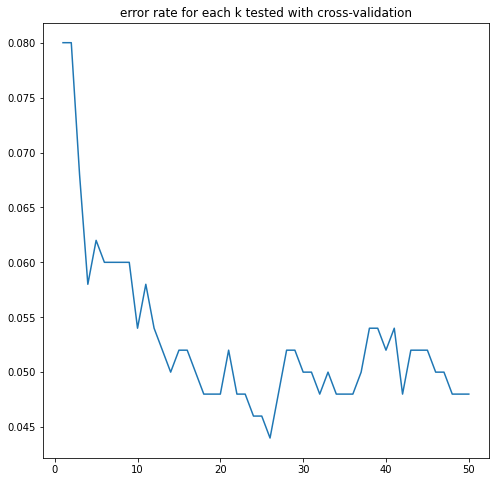

The best k found is 26 with a error rate = 0.04399999999999993
Will use k = 26 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.95
Top 2 rate :  0.992
Error rate :  0.002
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   1 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  97 │   3 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   1 │   5 │  84 │   1 │   9 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   3 │  97 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   1 │   0 │  99 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


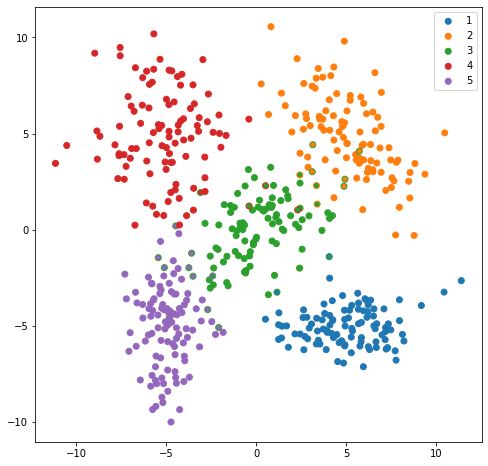

In [44]:
kppv = KppvModel()
kppv.vote_method = "majority"
kppv.get_k_cross_validation(split_data_tp2_app, 50, 5)
kppv.compute_kppv(split_data_tp2_app, split_data_tp2_dec)
kppv.print_model_result()
kppv.plot_test_data()

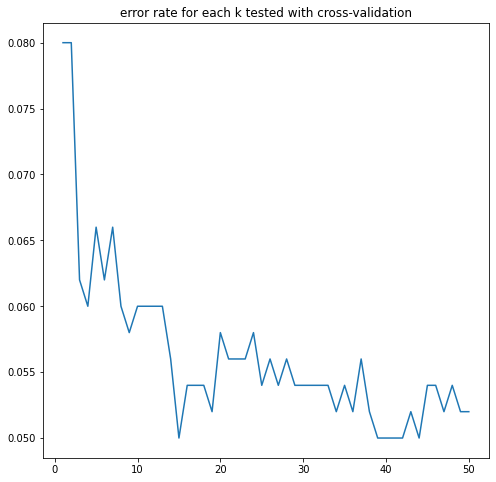

The best k found is 15 with a error rate = 0.050000000000000044
Will use k = 15 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.632
Error rate :  0.364
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   1 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  97 │   3 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   2 │   5 │  82 │   2 │   9 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   4 │  96 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   1 │   0 │  99 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


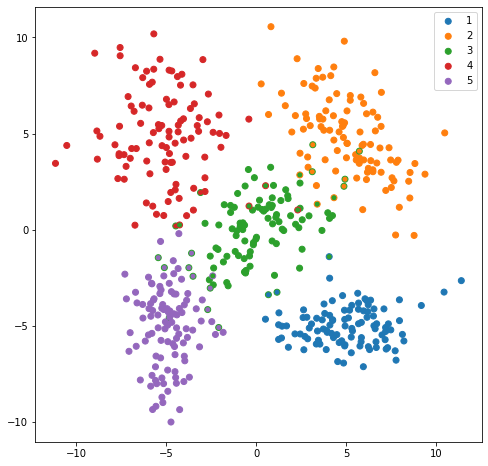

In [45]:
kppv = KppvModel()
kppv.vote_method = "unanimous"
kppv.get_k_cross_validation(split_data_tp2_app, 50, 5)
kppv.compute_kppv(split_data_tp2_app, split_data_tp2_dec)
kppv.print_model_result()
kppv.plot_test_data()

Pour l'analyse du deuxième jeu de données, on remarque une grosse disparité entre les votes à la majorité et à l'unanimité. La cross-validation trouve deux valeurs de K optimal différents, 26 et 15. Les K supérieur ont des taux d'erreur supérieur ce qui pourrait être dû au sur-apprentissage. Lorsque que l'on compare les résultats sur le jeu de test, on remarque que pour le vote à la majorité le taux de Top 1 a augmenté en passant de 92% à 95%. En revanche pour le vote à l'unanimité, le taux de Top 1 est de seulement 63% avec un taux d'erreur de 36%. Ce taux Top 1 faible est dû aux cas ou il y a plusieurs classes possible trouvé. Le vote à l'unanimité ne peux pas gérer ces cas alors que celui à la majorité oui. L'étude des tableaux ou des graphs montre des résultats similaire entre les deux. En effet j'ai décidé de remplir les tableaux sans tenir compte des erreurs. Dans tous les cas le tableau est rempli avec la valeur majoritaire. La différence entre les tableaux est donc expliqué uniquement par la différence de K. Dans ce cas on remarque qu'un K plus petit donne un meilleur résultats.

### Dataset 3

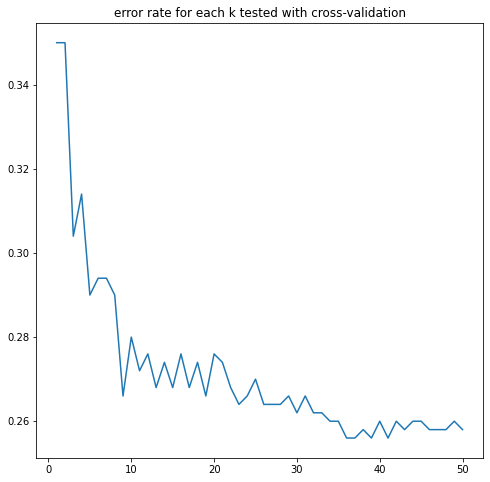

The best k found is 36 with a error rate = 0.256
Will use k = 36 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.71
Top 2 rate :  0.858
Error rate :  0.024
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  31 │  19 │  21 │  13 │  16 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │  10 │  80 │   5 │   0 │   5 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │  12 │   4 │  83 │   1 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │  15 │   0 │   9 │  74 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   6 │   5 │   0 │   0 │  89 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


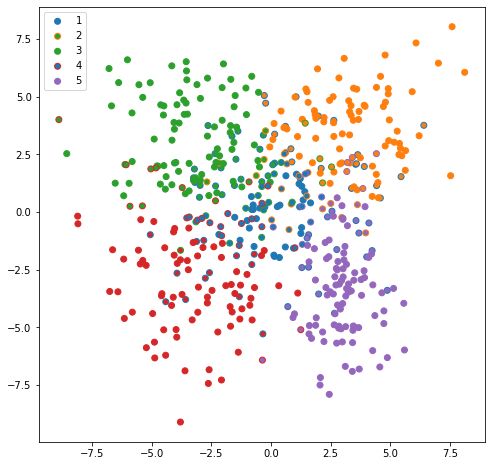

In [46]:
kppv = KppvModel()
kppv.vote_method = "majority"
kppv.get_k_cross_validation(split_data_tp3_app, 50, 5)
kppv.compute_kppv(split_data_tp3_app, split_data_tp3_dec)
kppv.print_model_result()
kppv.plot_test_data()

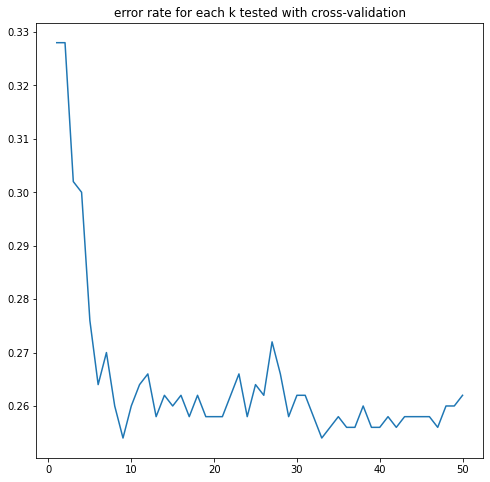

The best k found is 9 with a error rate = 0.2539999999999999
Will use k = 9 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.242
Error rate :  0.744
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  37 │  18 │  16 │  15 │  14 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │  13 │  76 │   5 │   0 │   6 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │  16 │   6 │  77 │   1 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │  19 │   0 │  10 │  68 │   3 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   7 │   5 │   0 │   0 │  88 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


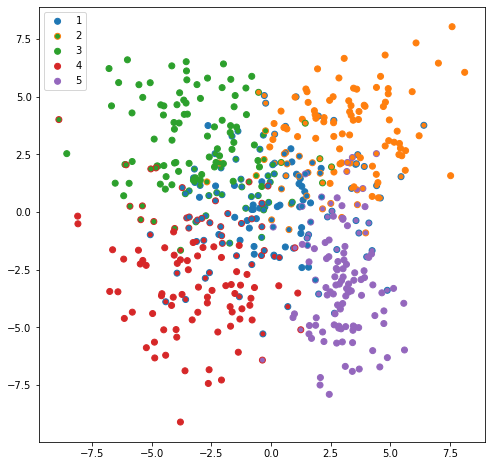

In [47]:
kppv = KppvModel()
kppv.vote_method = "unanimous"
kppv.get_k_cross_validation(split_data_tp3_app, 50, 5)
kppv.compute_kppv(split_data_tp3_app, split_data_tp3_dec)
kppv.print_model_result()
kppv.plot_test_data()

Pour ce dernier jeu de données, les conclusions sont similaire à ceux du deuxième jeu de données. En effet, les valeurs de K trouvés par cross-validation sont différentes. Cependant cette différence provient de la cross-validation car de nombreuses executions ne donnent jamais les mêmes valeurs de K, comme précédement le taux Top 1 est meilleur pour le vote à la majorité. Et encore une fois lorsque l'on compare les résultats du tableau et du graphique on remarque qu'un K plus grand permet de meilleurs résultats donc ce n'est pas le sur-apprentissage qui explique l'augmentation du taux d'erreur lors de la cross-validation. 

La méthode de classification par Kppv ne semble pas plus performante que l'estimation gaussienne alors que le modèle est plus lent et plus complexe. 

## Comparaison avec scikit-learn
Nous allons utiliser le kppv de scikit learn avec la même valeur de k et comparer les résultats. 

In [49]:
from sklearn.neighbors import KNeighborsClassifier

x_train, y_train, x_test, y_test = create_train_test_data_format_scikit(split_data_tp1_app, split_data_tp1_dec)
kppv1 = KNeighborsClassifier(n_neighbors=1)
kppv1.fit(x_train, y_train)
print("kppv dataset 1 :")
print(kppv1.score(x_test, y_test))

x_train, y_train, x_test, y_test = create_train_test_data_format_scikit(split_data_tp2_app, split_data_tp2_dec)
kppv1 = KNeighborsClassifier(n_neighbors=15)
kppv1.fit(x_train, y_train)
print("kppv dataset 2 :")
print(kppv1.score(x_test, y_test))

x_train, y_train, x_test, y_test = create_train_test_data_format_scikit(split_data_tp3_app, split_data_tp3_dec)
kppv1 = KNeighborsClassifier(n_neighbors=36)
kppv1.fit(x_train, y_train)
print("kppv dataset 3 :")
print(kppv1.score(x_test, y_test))

kppv dataset 1 :
0.992
kppv dataset 2 :
0.948
kppv dataset 3 :
0.712


Les résultats sont cohérent entre la méthode développé et celle de la librairie scikit learn

# Methode de Parzen
Comme précédement pour le kppv, la méthode de Parzen est un modèle paramétrique. Dans ce cas le paramètre est noté h et correspond à la largeur de la fonction uniforme ou à l'écart-type de la fonction gaussienne. Comme précédement, cet hyper-paramètre doit être trouvé. Nous allons donc utiliser la méthode de la cross-validation. En effet étudier le modèle avec un h aléatoire n'est pas pertinent. 
## Noyau uniforme
Pour le noyau uniforme j'ai décidé de tester tout les h possible entre 0,1 et 5 avec un pas de 0,1. J'ai décidé d'aller j'usqu'a 5 car cela représente environ la moitité de la taille des classes.
### Dataset 1

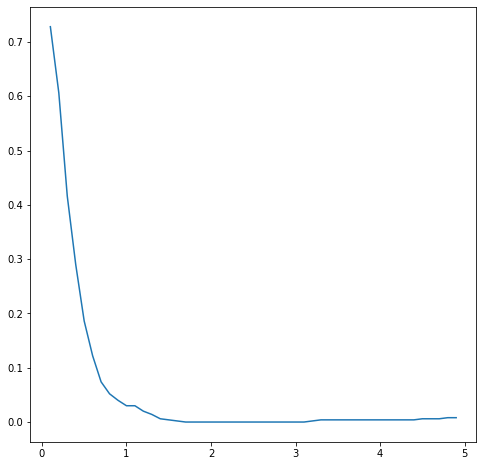

The best h found is 1.7000000000000002 with a error rate = 0.0
Results :
----------------

Top results :
----------------
Top 1 rate :  0.99
Top 2 rate :  0.996
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   1 │  99 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   1 │   0 │  99 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   0 │ 100 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   1 │   0 │   1 │   0 │  98 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


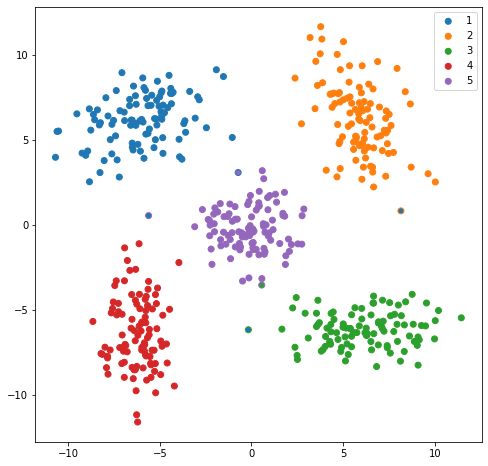

In [50]:
parzen = ParzenModel()
h_list = np.arange(0.1, 5, 0.1)
parzen.method = "uniform"
parzen.get_h_cross_validation(split_data_tp1_app, h_list, 5)
parzen.compute_parzen(split_data_tp1_app, split_data_tp1_dec)
parzen.print_model_result()
parzen.plot_test_data()

L'analyse de l'hyperparamètre h montre que pour la méthode uniforme plus le h est important plus le taux d'erreur est faible avec un plateau atteint aux environ de 2. Finalement le taux de bonne classification est identiques aux autres modèles de classification. 
### Dataset 2

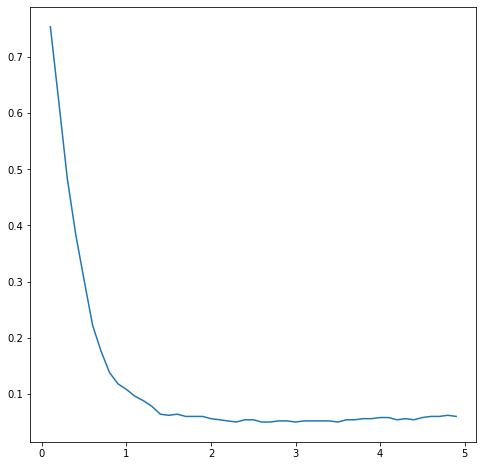

The best h found is 2.3000000000000003 with a error rate = 0.050000000000000044
Results :
----------------

Top results :
----------------
Top 1 rate :  0.95
Top 2 rate :  0.996
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   1 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   1 │  96 │   3 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   1 │   5 │  85 │   1 │   8 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   4 │  96 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   1 │   0 │  99 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


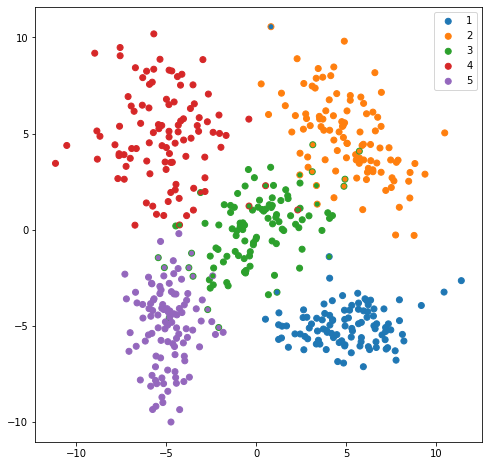

In [51]:
parzen = ParzenModel()
h_list = np.arange(0.1, 5, 0.1)
parzen.method = "uniform"
parzen.get_h_cross_validation(split_data_tp2_app, h_list, 5)
parzen.compute_parzen(split_data_tp2_app, split_data_tp2_dec)
parzen.print_model_result()
parzen.plot_test_data()

Malgré un jeu de données plus complexe pour le jeu de données 2 on remarque un profil de taux d'erreur en fonction de H similaire avec un plateau commencant vers 2. Les résultats de classification top 1 semblent identique autres modèles (95%). Comme pour tout les modèles on remarque que la classe 3 est toujours la plus mal classé car se trouvant au centre des autres. 

### Dataset 3

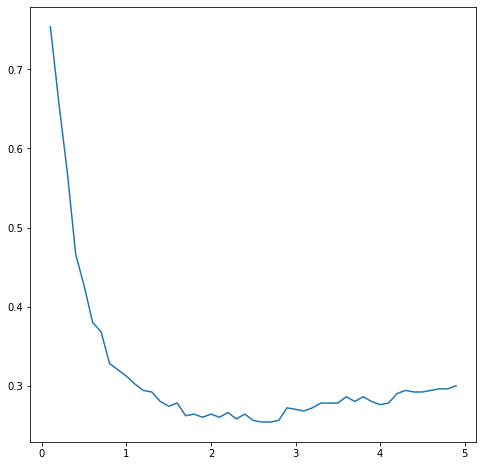

The best h found is 2.6 with a error rate = 0.254
Results :
----------------

Top results :
----------------
Top 1 rate :  0.714
Top 2 rate :  0.878
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  33 │  18 │  18 │  15 │  16 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   7 │  82 │   6 │   0 │   5 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │  13 │   4 │  81 │   2 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │  18 │   0 │   9 │  70 │   3 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   3 │   6 │   0 │   0 │  91 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


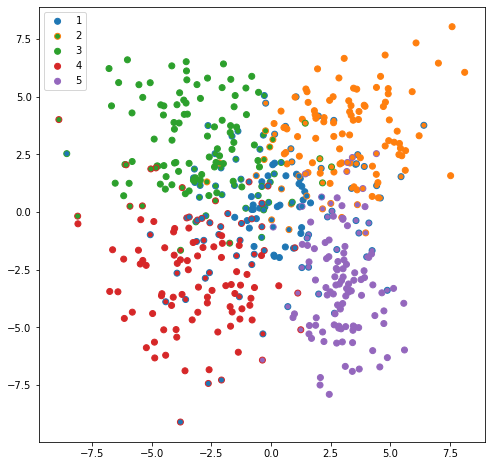

In [52]:
parzen = ParzenModel()
h_list = np.arange(0.1, 5, 0.1)
parzen.method = "uniform"
parzen.get_h_cross_validation(split_data_tp3_app, h_list, 5)
parzen.compute_parzen(split_data_tp3_app, split_data_tp3_dec)
parzen.print_model_result()
parzen.plot_test_data()

Comme pour les deux autres datasets, le taux d'erreur varie de la même façon en fonction du h. On obtient un plateau au environ de 2. Les résultats de Top 1 montre un taux d'erreur similaire aux autres modèles, pas d'amélioration. La classe 1 est très mal classé, ce qui s'explique par la position de cette classe. lorsque l'on regarde les données on remarque que les points se mélangent avec les autres classes. Le graphique montre en revanche des points mal classé de façon totalement illogique, tel que les points rouges en bas qui sont trouvé en bleu. 
## Noyau Gaussien
Nous allons maintenant étudier la méthode de Parzen avec un noyau gaussien. Contrairement au noyau uniforme, les résultats sont plus quantitatif et non binaire. Ceci va normalement permettre d'afiner le modèle. Nous allons encore une fois utiliser un hyperparamètre h. Le h correspond cette fois ci à l'écart type de la gaussienne utilisé. Comme précédement nous allons estimer le h par cross-validation.
### Dataset 1

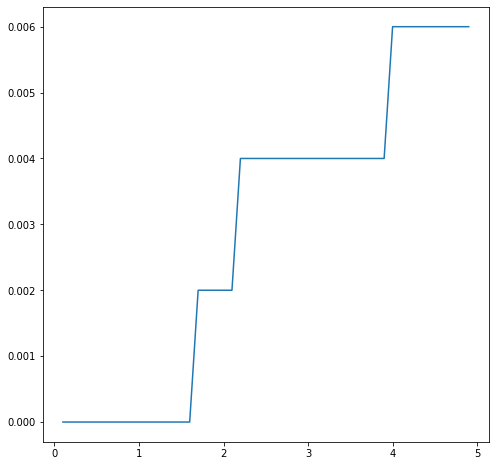

The best h found is 0.1 with a error rate = 0.0
Results :
----------------

Top results :
----------------
Top 1 rate :  0.992
Top 2 rate :  0.998
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  99 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │ 100 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   0 │ 100 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   1 │   1 │  98 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


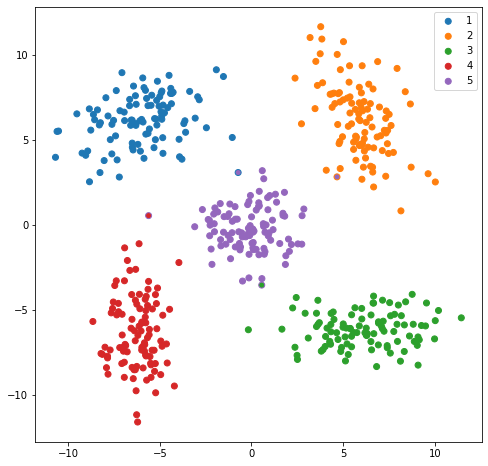

In [53]:
parzen = ParzenModel()
h_list = np.arange(0.1, 5, 0.1)
parzen.method = "gaussian"
parzen.get_h_cross_validation(split_data_tp1_app, h_list, 5)
parzen.compute_parzen(split_data_tp1_app, split_data_tp1_dec)
parzen.print_model_result()
parzen.plot_test_data()

Pour le premier jeux de données, le meilleur h trouvé est le minimum soit 0,1. Plus le h augmente plus le niveau d'erreur est haut donc nous utilisons le minimum. Finalement le taux de Top 1 ainsi que la matrice de confusion et le graphique final ne montre pas d'amélioration du niveau de classification par rapport aux autres classifieur

### Dataset 2

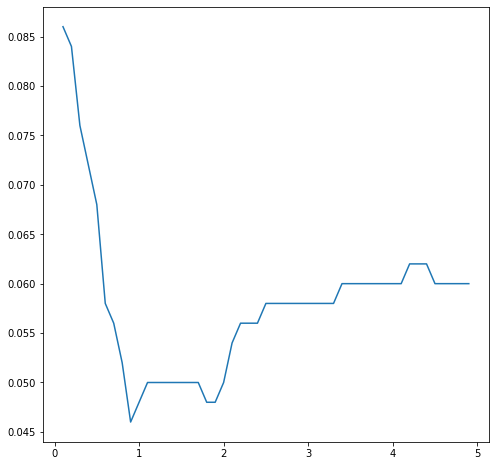

The best h found is 0.9 with a error rate = 0.04600000000000004
Results :
----------------

Top results :
----------------
Top 1 rate :  0.948
Top 2 rate :  0.994
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   1 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  98 │   2 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   2 │   5 │  82 │   1 │  10 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   3 │  96 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   1 │   0 │  99 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


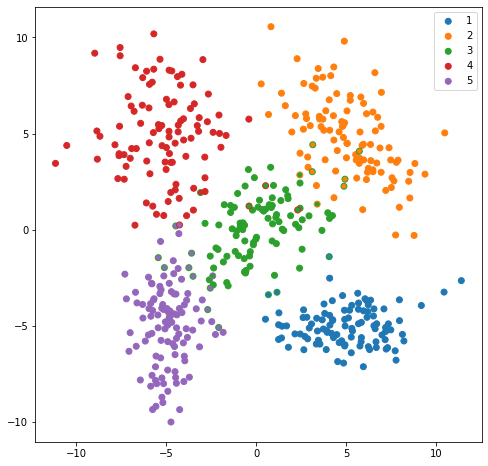

In [54]:
parzen = ParzenModel()
h_list = np.arange(0.1, 5, 0.1)
parzen.method = "gaussian"
parzen.get_h_cross_validation(split_data_tp2_app, h_list, 5)
parzen.compute_parzen(split_data_tp2_app, split_data_tp2_dec)
parzen.print_model_result()
parzen.plot_test_data()

L'analyse du deuxième jeu de données montre que pour des données plus mélangés, un h plus élévé est necessaire. On remarque que la valeur optimal est aux alentour de 1 avec une augmentation du taux d'erreur au delà. Avec cet hyperparamètre, le taux de classification Top 1 est finalement similaire à tous les autres. Il n'y a pas de de plus-value à utiliser une modèle plus complexe que l'uniforme.  

### Dataset 3

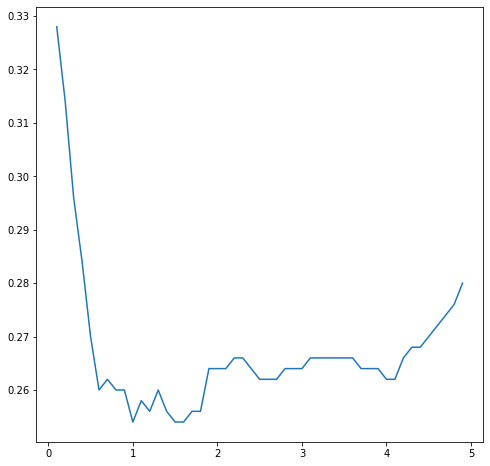

The best h found is 1.5000000000000002 with a error rate = 0.2539999999999999
Results :
----------------

Top results :
----------------
Top 1 rate :  0.726
Top 2 rate :  0.882
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  35 │  19 │  17 │  13 │  16 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   7 │  82 │   6 │   0 │   5 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │  12 │   4 │  82 │   2 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │  15 │   0 │   9 │  73 │   3 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   3 │   6 │   0 │   0 │  91 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


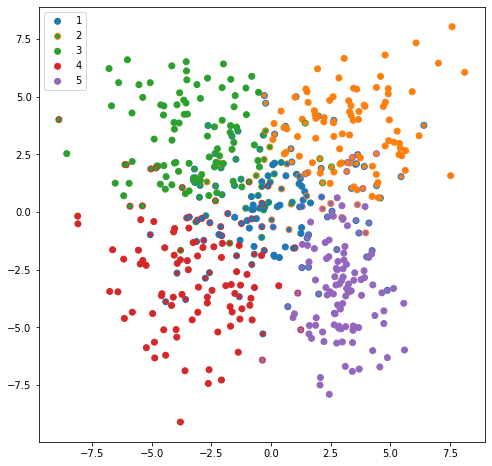

In [55]:
parzen = ParzenModel()
h_list = np.arange(0.1, 5, 0.1)
parzen.method = "gaussian"
parzen.get_h_cross_validation(split_data_tp3_app, h_list, 5)
parzen.compute_parzen(split_data_tp3_app, split_data_tp3_dec)
parzen.print_model_result()
parzen.plot_test_data()

La cross-validation faite sur ce troisième jeu de données montre que un hyperparamètre optimal aux alentour de 1,5. Comme pour le précédent jeu de données, lorsque l'on augmente la valeur de h au dessus de 1,5 le taux d'erreur augmente. Avec cet h, le taux de classification et la matrice de confusion montre des résultats identiques aux autres modèles.  

## Comparaison avec scikit learn

In [56]:
print("Score Dataset 1")
print(find_best_score_kernel(split_data_tp1_app, split_data_tp1_dec))
print("Score Dataset 2")
print(find_best_score_kernel(split_data_tp2_app, split_data_tp2_dec))
print("Score Dataset 3")
print(find_best_score_kernel(split_data_tp3_app, split_data_tp3_dec))

Score Dataset 1
0.994
Score Dataset 2
0.946
Score Dataset 3
0.686


Les taux de bonne classification Top 1 sont cohérent entre notre modèle et celui de Scikit learn. Pour le dernier jeu de données, le taux obtenu avec la librairie est un peu moins bon, cela peut venir de l'hyperparamètre H qui n'est pas optimisé pour ce classifieur. 

# Séparation linéaire
## Comparaison un contre un
Nous allons maintenant étudier le modèle de la séparation linéaire. Pour cela nous allons commencer par tester des séparations linéaires entre chaques classes. Pour la décision finale nous compterons combien de fois chaque classe à été trouvé pour chaque séapration. 
### Dataset 1

The hyperplan between 1 and 2 is [-12.527644, 1.1843279999999998, 0.0]
The hyperplan between 1 and 3 is [-6.315382, 6.344938, 1.0]
The hyperplan between 1 and 4 is [0.5455020000000008, 12.073574, 0.0]
The hyperplan between 1 and 5 is [-1.2287560000000002, 3.0565520000000013, -13.0]
The hyperplan between 2 and 3 is [4.274954000000001, 13.146555000000001, 1.0]
The hyperplan between 2 and 4 is [3.043789, 6.633307, 1.0]
The hyperplan between 2 and 5 is [4.288296999999989, 8.924386000000005, -45.0]
The hyperplan between 3 and 4 is [16.061825, 0.5501550000000002, 1.0]
The hyperplan between 3 and 5 is [3.655844, -2.9535270000000002, -15.0]
The hyperplan between 4 and 5 is [-4.853987000000001, -3.230916000000002, -20.0]


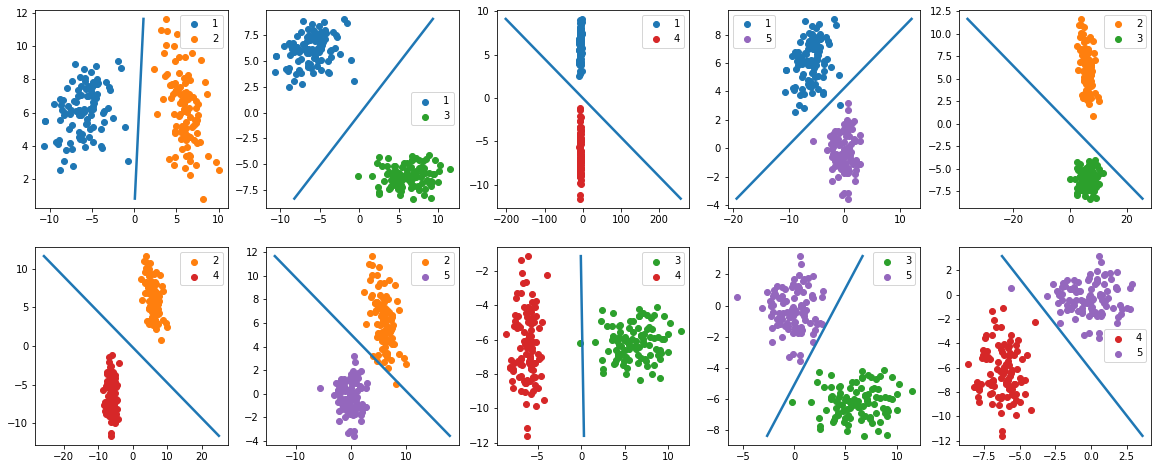

Results :
----------------

Top results :
----------------
Top 1 rate :  0.994
Top 2 rate :  1.0
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │ 100 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │  99 │   1 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   0 │ 100 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   1 │   0 │   0 │   0 │  99 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


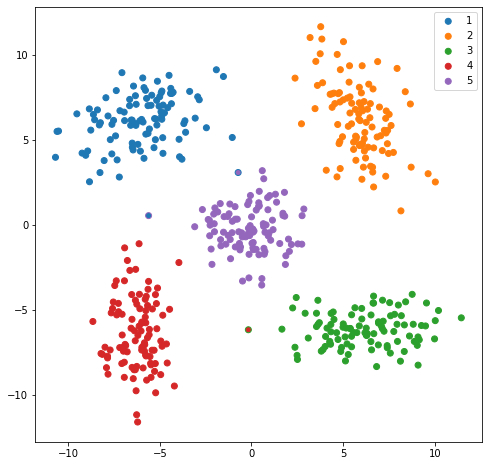

In [57]:
linear = LinearSeparationModel()
model = linear.linear_train(split_data_tp1_app, is_converging=True, one_vs_all=False) 
linear.print_model()
linear.test_linear_model(split_data_tp1_dec, model)
linear.plot_linear_data()
linear.print_model_result()
linear.plot_test_data()

Ce premier jeu de données à des données qui peuvent être séparées linéairement. Donc nous testons la méthode convergente. L'analyse des différents graphiques de séparations linéaires entre les classes montre que pour les classes avec une séparation verticale la droite est relativement bien placé alors que pour les graphs avec une séparation linéaire horizontale, les droites sont moins bonne. Ceci peut s'expliqué par la méthode. Nous validons une droite dès que les données sont toutes bien classées. Nous ne faisons pas d'epochs pour permettre d'améliorer la distance entre les points et la droite. Finalement le taux de Top 1 de bonne classification est similaire aux autres modèles. Donc il est lui aussi pertinent pour un jeu de données relativement bien séparé. 

### Dataset 2

The hyperplan between 1 and 2 is [0.08077299999999976, -7.258763, 0.0]
The hyperplan between 1 and 3 is [5.814149999999998, -6.574709000000005, -31.0]
The hyperplan between 1 and 4 is [4.917866, -3.116518, 1.0]
The hyperplan between 1 and 5 is [11.480842, -1.242299000000001, 1.0]
The hyperplan between 2 and 3 is [-1.2162419999999994, -0.2824110000000011, -15.0]
The hyperplan between 2 and 4 is [27.675311999999863, 8.293448999999992, -54.0]
The hyperplan between 2 and 5 is [2.085519, 7.437741, 1.0]
The hyperplan between 3 and 4 is [12.025942000001265, -16.827372000000356, 47.0]
The hyperplan between 3 and 5 is [6.329518999999995, 9.32412199999927, 23.0]
The hyperplan between 4 and 5 is [-1.6236550000002676, 23.116414999998344, -2.0]


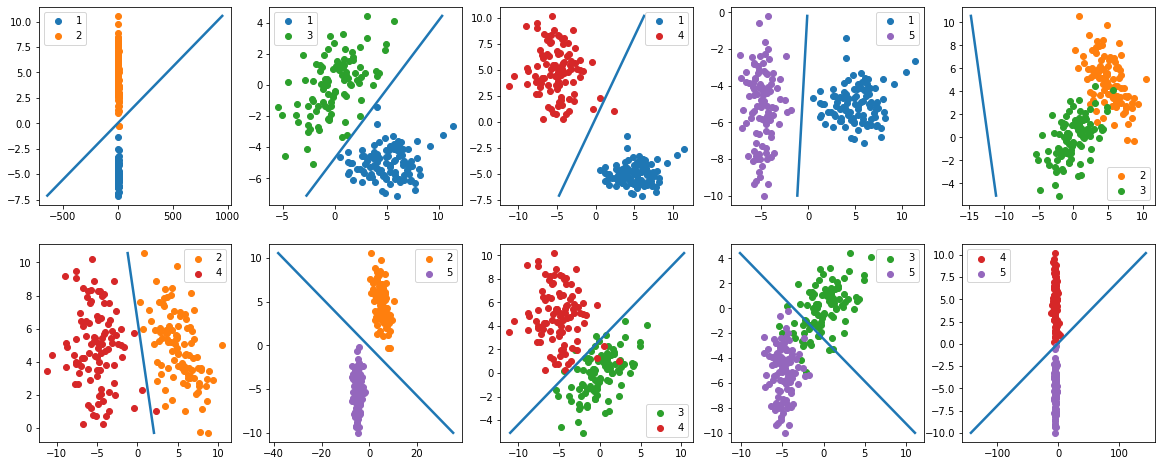

Results :
----------------

Top results :
----------------
Top 1 rate :  0.814
Top 2 rate :  0.992
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │ 100 │   0 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   2 │  35 │  63 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   1 │   0 │  76 │   3 │  20 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   3 │  97 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   0 │   1 │  99 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


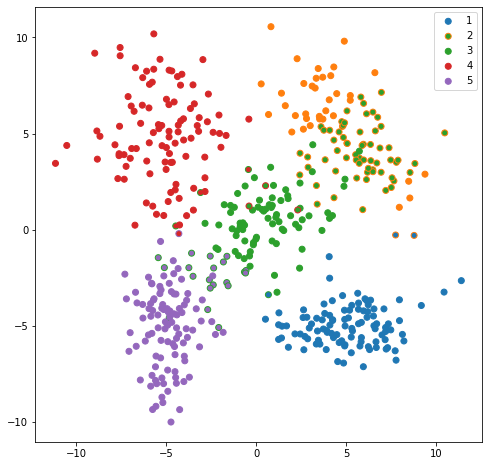

In [58]:
linear = LinearSeparationModel()
linear.epochs = 1000
model = linear.linear_train(split_data_tp2_app, is_converging=False, one_vs_all=False)
linear.print_model()
linear.test_linear_model(split_data_tp2_dec, model)
linear.plot_linear_data()
linear.print_model_result()
linear.plot_test_data()

Le deuxième jeu de données n'est pas convergent. En effet on ne peut pas trouver de droites qui séparent toutes les classes entre elles sans aucune erreur. Nous décidons donc de fixer le nombre d'epoch réalisées pour améliorer le modèle. J'ai commencé par réaliser 100 epochs. L'observation des droites produites me semblaient bonnes sauf pour celle séparant les classes 2 et 3. En effet la droite de séparation se trouve à gauche des deux jeux de données. J'ai donc décidé de monter le nombre d'epoch à 1000. On remarque que ça ne permet pas d'améliorer le modèle. Les classes 2 et 3 sont toujours mal classées. 

L'analyse des résultats montre un taux de classification Top 1 inférieur aux autres méthodes, seulement 80%. La matrice de convolution et le graphique des résultats confirment bien que le problème provient bien de la différenciation entre les classes 2 et 3.

### Dataset 3

The hyperplan between 1 and 2 is [-1.940256000000086, -3.2953810000003507, 1.0]
The hyperplan between 1 and 3 is [7.387468000000567, -4.569876999999707, 0.0]
The hyperplan between 1 and 4 is [1.7738720000004198, 8.916033999999632, 8.0]
The hyperplan between 1 and 5 is [-5.469978999999629, 1.472946999999904, 4.0]
The hyperplan between 2 and 3 is [5.062849000000009, -2.876412000000001, -5.0]
The hyperplan between 2 and 4 is [0.5943390000002593, 3.785298000000134, -1.0]
The hyperplan between 2 and 5 is [-4.519865000000024, 1.924168000000208, 2.0]
The hyperplan between 3 and 4 is [-2.4475439999999997, 12.221326000000001, 1.0]
The hyperplan between 3 and 5 is [-10.626813000000485, 1.4997220000000517, 7.0]
The hyperplan between 4 and 5 is [-11.094683000000892, 1.2322880000002834, 8.0]


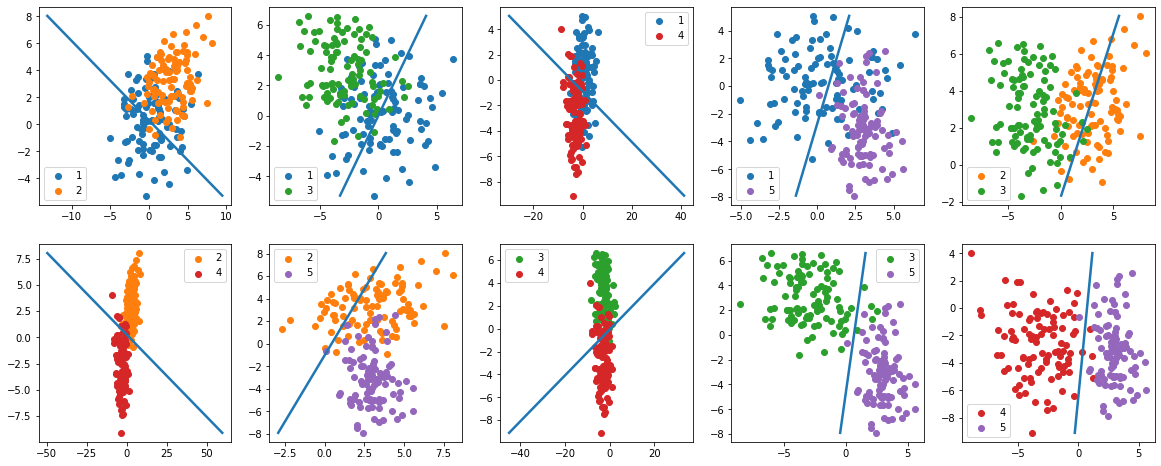

Results :
----------------

Top results :
----------------
Top 1 rate :  0.552
Top 2 rate :  0.81
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │   3 │   4 │  37 │  18 │  38 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   1 │  12 │  17 │   0 │  70 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   1 │  92 │   3 │   4 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   3 │   0 │  24 │  70 │   3 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   1 │   0 │   0 │   0 │  99 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


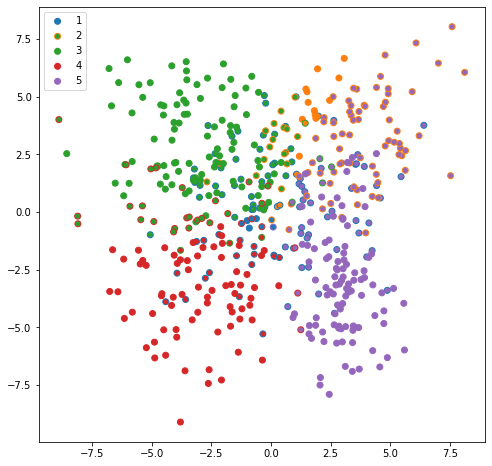

In [59]:
linear = LinearSeparationModel()
linear.epochs = 1000
model = linear.linear_train(split_data_tp3_app, is_converging=False, one_vs_all=False)
linear.print_model()
linear.test_linear_model(split_data_tp3_dec, model)
linear.plot_linear_data()
linear.print_model_result()
linear.plot_test_data()

Le jeu de données 3 est le plus complexe, avec les classes les plus mélangés. Donc l'analyse des différentes classes et de leurs séparation linéaire est relativement mauvaise comme attendu. Pourtant après de multiples test, augmenter le nombre d'époch n'améliore pas le modèle. On peut penser que les poids se trouvent dans des minima locaux qui ne leurs permettent pas de trouver les minima globaux. 

Finalement l'analyse des résultats de ce modèle est cohérent avec la prédiction. En effet il est moins bon que les précédents avec seulement 55% de bonne classification Top 1. En revanche en étudiant les différentes classes on remarque qu'il y a une grande disparité. Les classes 3 et 5 sont bien classées alors que les 1 et 2 ont des score très mauvais. On remarque que pour ces deux classes, le modèle trouve majoritairement les classes 3 et 5. On peut donc en déduire que ce modèle donne trop de poid à ces deux classes. 

## Comparaison un contre tous
Après avoir essayé de comparer chaque classe une à une nous allons tenter de voir si nous pouvons trouver une séparation linéaire pouvant séparer une classe contre toutes les autres. Pour cela nous allons supprimer la classe centrale de chaque jeu de données. Car chevauchant régulièrement les autres classes elle poserait problème.

### Dataset 1
D'après la représentation graphique de l'analyse visuelle on remarque que la classe centrale est la classe 5. Nous supprimons donc cette classe et étudions la séparation des 4 classes restantes.

The hyperplan between 1 and others is [-13.294491999999996, 10.884927000000006, -80.0]
The hyperplan between 2 and others is [12.350891999999991, 8.665190000000006, -73.0]
The hyperplan between 3 and others is [21.423774999999978, -4.670565999999971, -101.0]
The hyperplan between 4 and others is [-32.477086000000625, -39.10292099999996, -210.0]
Results :
----------------

Top results :
----------------
Top 1 rate :  0.8425
Error rate :  0.15
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │
╞════╪═════╪═════╪═════╪═════╡
│  1 │  98 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  54 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │  85 │   0 │
├────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   3 │ 100 │
╘════╧═════╧═════╧═════╧═════╛
----------------


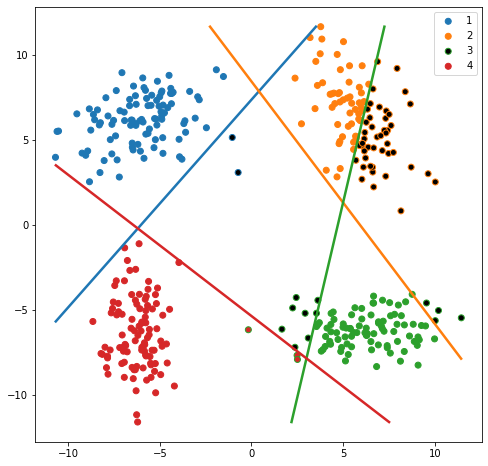

In [60]:
clean_app_data = GeneralModel.remove_one_class_from_data(split_data_tp1_app, '5')
clean_dec_data = GeneralModel.remove_one_class_from_data(split_data_tp1_dec, '5')
linear = LinearSeparationModel()
linear.epochs = 1000
model = linear.linear_train(clean_app_data, is_converging=False, one_vs_all=True)
linear.print_model()
linear.test_linear_model(clean_dec_data, model)
linear.print_model_result()
linear.plot_test_data()

Une première tentative avec une méthode convergente n'a pas pu aboutir comme pour la séparation un contre un. Donc le modèle est non convergent avec 1000 epochs comme pour les autres jeux de données. Le jeu de données 1 peut relativement bien être séparé par des droites entre les classes et le reste. En revanche le taux de bonne classification reste moins bon que les autres modèles, malgré le retrait de la classe centrale. L'analyse du graph montre que ce sont les classes 2 et 3 qui posent problème. Cependant la comparaison n'est pas totalement pertinente car nous comparons un jeu de données moins complexe que celui utilisé dans les autres méthodes. La matrice de confusion et le graphique des résultats montre que peux de points sont mal classées mais qu'une bonne partie d'entre eux ne sont pas classable car présent dans deux classes ou plus. 

### Dataset 2

The hyperplan between 1 and others is [11.824489000000067, -8.464917000000044, -71.0]
The hyperplan between 2 and others is [21.504155999999956, 17.325372999999516, -111.0]
The hyperplan between 4 and others is [0.11333100000001295, 11.882466999999998, -26.0]
The hyperplan between 5 and others is [-17.48833299999998, -16.23575999999995, -74.0]
Results :
----------------

Top results :
----------------
Top 1 rate :  0.67
Error rate :  0.315
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╡
│  1 │  86 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┤
│  2 │   0 │   3 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   1 │  79 │   0 │
├────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   5 │ 100 │
╘════╧═════╧═════╧═════╧═════╛
----------------


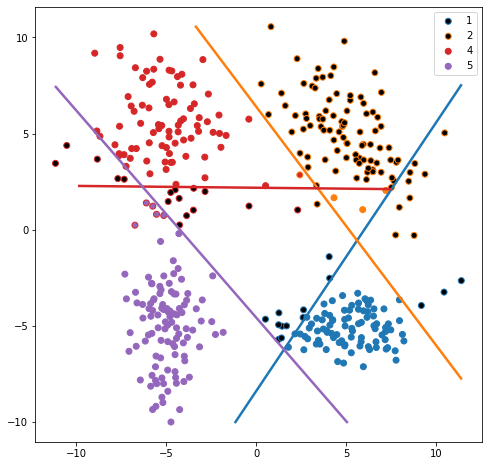

In [61]:
clean_app_data = GeneralModel.remove_one_class_from_data(split_data_tp2_app, '3')
clean_dec_data = GeneralModel.remove_one_class_from_data(split_data_tp2_dec, '3')
linear = LinearSeparationModel()
linear.epochs = 1000
model = linear.linear_train(clean_app_data, is_converging=False, one_vs_all=True)
linear.print_model()
linear.test_linear_model(clean_dec_data, model)
linear.print_model_result()
linear.plot_test_data()

Comme précédemment nous utilisons 1000 epochs pour trouver le meilleur modèle. Le taux de Top 1 est toujours plus faible que celui des autres modèles. Lorsque l'on étudie la matrice de confusion et le graphique des résultats, on remarque que la classe 2 est très mal classé. La plupart des droites séparent bien les classes des autres. En revanche pour la classe 4, la droite ne dissocie pas les classes 2 et 4. Ceci implique que les points de classe 2 sont tous mal classés. Malgré des tests pour augmenter le nombre d'epochs, les résultats ne s'améliorent pas.

### Dataset 3

The hyperplan between 2 and others is [-0.7508819999991991, 2.975993999999586, -9.0]
The hyperplan between 3 and others is [-6.575143000000733, 5.777476000000332, -2.0]
The hyperplan between 4 and others is [-6.955338999999998, -1.7511040000000024, -14.0]
The hyperplan between 5 and others is [11.235642999999985, -5.00846000000001, -15.0]
Results :
----------------

Top results :
----------------
Top 1 rate :  0.355
Error rate :  0.5
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╕
│    │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╡
│  2 │   0 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┤
│  3 │  11 │  16 │   6 │   0 │
├────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │  29 │   0 │
├────┼─────┼─────┼─────┼─────┤
│  5 │  34 │   2 │   5 │  97 │
╘════╧═════╧═════╧═════╧═════╛
----------------


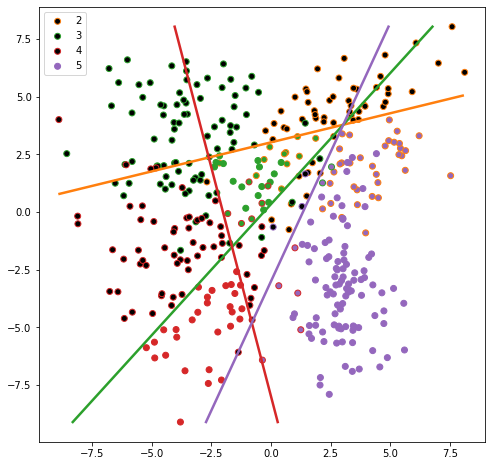

In [62]:
clean_app_data = GeneralModel.remove_one_class_from_data(split_data_tp3_app, '1')
clean_dec_data = GeneralModel.remove_one_class_from_data(split_data_tp3_dec, '1')
linear = LinearSeparationModel()
linear.epochs = 1000
model = linear.linear_train(clean_app_data, is_converging=False, one_vs_all=True)
linear.print_model()
linear.test_linear_model(clean_dec_data, model)
linear.print_model_result()
linear.plot_test_data()

Pour ce dernier jeu de données le taux de bonne classification est très faible. En effet le taux est de seulement 35%. Lorsque l'on regarde la matrice de confusion et le graphique, on remarque qu'une classe est bien classé et que toutes les autres sont mal classées. Avec même la classe 2 qui a un taux de bonne classification de 0. 

Pour des jeux de données complexe comme les datasets 2 et 3, la séparation linéaire n'est donc pas recommandé. 

## Comparaison avec scikit learn

In [36]:
from sklearn.svm import LinearSVC

x_train, y_train, x_test, y_test = create_train_test_data_format_scikit(split_data_tp1_app, split_data_tp1_dec)
svc1 = LinearSVC()
svc1.fit(x_train, y_train)
print("séparation linéaire dataset 1 :")
print(svc1.score(x_test, y_test))

x_train, y_train, x_test, y_test = create_train_test_data_format_scikit(split_data_tp2_app, split_data_tp2_dec)
svc1 = LinearSVC()
svc1.fit(x_train, y_train)
print("séparation linéaire dataset 1 :")
print(svc1.score(x_test, y_test))

x_train, y_train, x_test, y_test = create_train_test_data_format_scikit(split_data_tp3_app, split_data_tp3_dec)
svc1 = LinearSVC()
svc1.fit(x_train, y_train)
print("séparation linéaire dataset 1 :")
print(svc1.score(x_test, y_test))

séparation linéaire dataset 1 :
0.994
séparation linéaire dataset 1 :
0.934
séparation linéaire dataset 1 :
0.712


La séparation linéaire obtenue avec scikit learn permet de classifier avec un taux de réussite similaire aux autres méthodes contrairement à la séparation linéaire développé ici. De plus le temps d'execution est extrêmement court. On peut donc en déduire que ce n'est pas exactement le même algorithme utilisé dans la librairie.

## Bagging
Le modèle de séparation linéaire n'est pas optimal comparé aux autres méthodes. Nous allons donc utiliser une méthode de bootstrap nommé Bagging afin d'essayer d'améliorer les taux de bonne classification de ce modèle. 
### Dataset 1

Bagging Model created


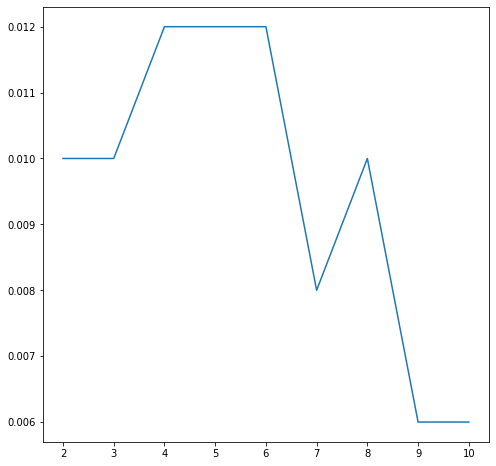

The best n found is 10 with a error rate = 0.005999999999999894
Results :
----------------

Top results :
----------------
Top 1 rate :  0.996
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │ 100 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │ 100 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   0 │ 100 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   1 │   0 │   0 │   0 │  99 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


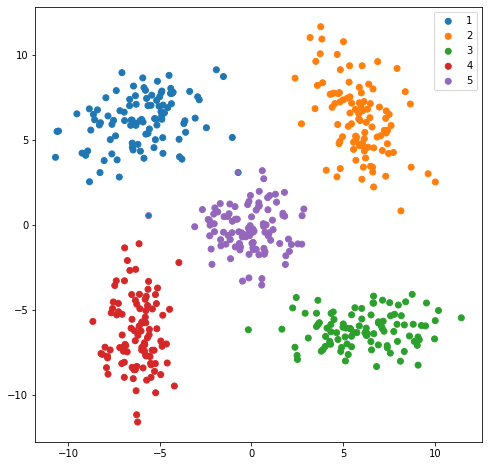

In [63]:
bagging = BaggingModel()
bagging.get_nb_bagging_cv(split_data_tp1_app, cv=5, max_n=10, is_converging=True)
bagging.test_bagging_linear_model(split_data_tp1_app, split_data_tp1_dec)
bagging.compute_bagging_results()
bagging.print_model_result()
bagging.plot_test_data()

Nous analysons le premier Dataset avec du bagging de spéaration linéaire. Lors de l'analyse précédente nous avons vu que le modèle est convergent. Nous allons donc continuer à utiliser cette méthode. Afin de connaitre le nombre de bagging optimal nous allons utiliser la cross validation comme précédement. Nous testons le modèle entre 1 et 10 n. Nous ne pouvons pas trop aller plus loin en nombre de n car le temps de calcul est très long. 

Avec cette cross-validation nous trouvons un nombre de bagging optimal de TODO. On remarque que le taux Top 1 est identique à celui des autres modèles. la matrice de confusion et le graphique confirme ce résultat. 

### Dataset 2

Bagging Model created


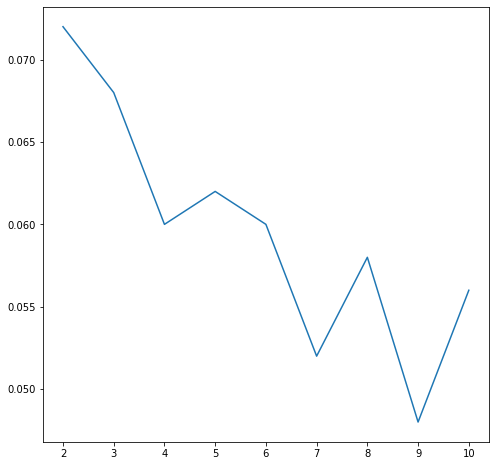

The best n found is 9 with a error rate = 0.04800000000000004
Results :
----------------

Top results :
----------------
Top 1 rate :  0.952
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │ 100 │   0 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  99 │   1 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   8 │  82 │   3 │   7 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   3 │  97 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   2 │   0 │  98 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


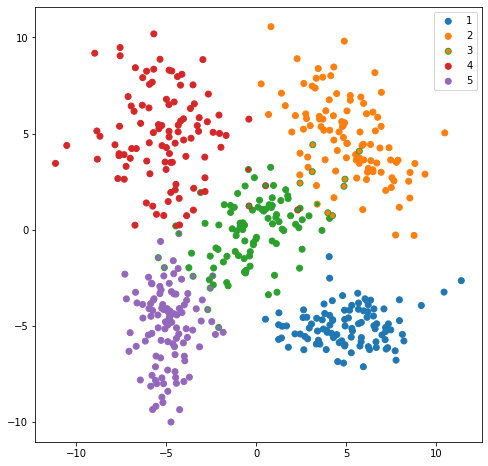

In [64]:
bagging = BaggingModel()
bagging.get_nb_bagging_cv(split_data_tp2_app, cv=5, max_n=10, is_converging=False)
bagging.test_bagging_linear_model(split_data_tp2_app, split_data_tp2_dec, is_converging=False)
bagging.compute_bagging_results()
bagging.print_model_result()
bagging.plot_test_data()

Ce deuxième jeu de données est non convergent comme vu précédemment donc nous allons utiliser un bagging sur un modèle linéaire non convergent. Le nombre d'epochs est fixé à 10. Cette valeur est relativement faible mais si nous utilisons le même nombre d'epochs que précédemment, le temps d'execution serait trop lent. De plus le nombre d'epochs est fixé à 10. Cette valeur très faible d'epochs produisait des résultats très mauvais avec le classifieur par séparation linéaire. 

La cross-validation du bagging montre que le nombre de bootstrap n'est pas très important car le taux d'erreur ne varie pas beaucoup entre chaque valeur de n. En revanche pour le taux de bonne classification en Top 1 on retrouve un résultat similaire que pour les anciens modèle. Ceci permet donc d'améliorer le modèle de séparation linéaire. La matrice de confusion et le graphique confirment ces résultats. Malgré un nombre d'epochs faible car 9 fois 10 fait seulement 90 epochs, produit un résultat meilleur que pour une séparation linéaire unique de 1000 epochs.

### Dataset 3

Bagging Model created


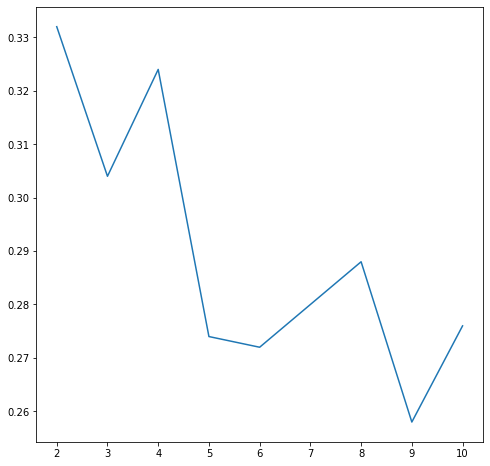

The best n found is 9 with a error rate = 0.258
Results :
----------------

Top results :
----------------
Top 1 rate :  0.678
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  31 │  31 │  14 │  12 │  12 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   6 │  88 │   3 │   0 │   3 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │  12 │  17 │  70 │   1 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │  18 │   0 │  16 │  64 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   4 │  10 │   0 │   0 │  86 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


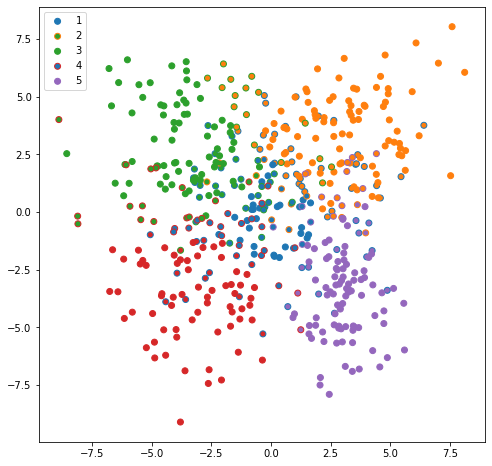

In [65]:
bagging = BaggingModel()
bagging.get_nb_bagging_cv(split_data_tp3_app, cv=5, max_n=10, is_converging=False)
bagging.test_bagging_linear_model(split_data_tp3_app, split_data_tp3_dec, is_converging=False)
bagging.compute_bagging_results()
bagging.print_model_result()
bagging.plot_test_data()

Le troisième jeu de données est analysé avec la méthode du bagging. Nous utilisons les mêmes paramètres que pour le deuxième. Nous obtenons des résultats similaire à ceux des autres modèles. Le bagging permet donc d'améliorer le taux de classification pour le modèle linéaire. Nous utilisons un nombre de bagging relativement faible. Peut être qu'un nombre de bootstrap plus important ameliorerais plus la classification. 

Nous allons donc essayer de voir si cette méthode de bagging permet d'améliorer une autre méthode ayant eu de bons résultats. Soit le kppv avec vote à la majorité. Nous allons utiliser les même K obtenu par cross-validation lors de l'analyse du Kppv. De même nous utiliserons le nombre de bagging trouvé pour la séparation linéaire, soit 9 bootstraps

## Bagging de Kppv

Bagging Model created
Will use k = 1 neighbours
Will use k = 1 neighbours
Will use k = 1 neighbours
Will use k = 1 neighbours
Will use k = 1 neighbours
Will use k = 1 neighbours
Will use k = 1 neighbours
Will use k = 1 neighbours
Will use k = 1 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.992
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  99 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │ 100 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   0 │ 100 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   1 │   1 │  98 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


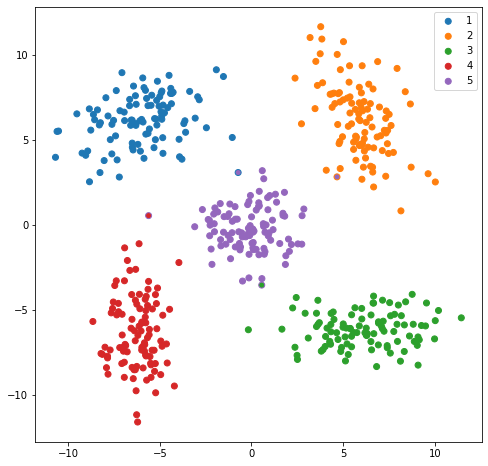

In [68]:
bagging = BaggingModel()
bagging.nb_models=9
bagging.test_bagging_kppv_model(split_data_tp1_app, split_data_tp1_dec, k=1)
bagging.compute_bagging_results()
bagging.print_model_result()
bagging.plot_test_data()

Bagging Model created
Will use k = 26 neighbours
Will use k = 26 neighbours
Will use k = 26 neighbours
Will use k = 26 neighbours
Will use k = 26 neighbours
Will use k = 26 neighbours
Will use k = 26 neighbours
Will use k = 26 neighbours
Will use k = 26 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.954
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   1 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  99 │   1 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   1 │   5 │  84 │   1 │   9 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   3 │  96 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   1 │   0 │  99 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


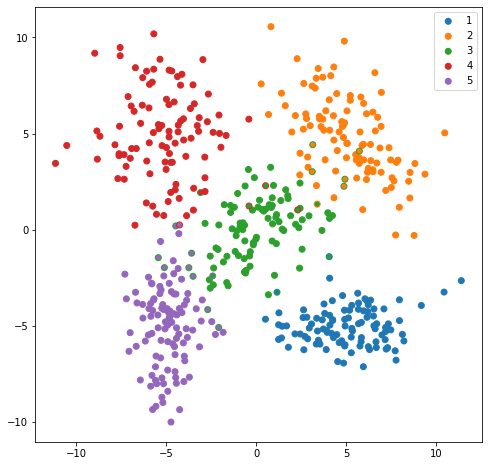

In [3]:
bagging = BaggingModel()
bagging.nb_models=9
bagging.test_bagging_kppv_model(split_data_tp2_app, split_data_tp2_dec, k=26)
bagging.compute_bagging_results()
bagging.print_model_result()
bagging.plot_test_data()

Bagging Model created
Will use k = 36 neighbours
Will use k = 36 neighbours
Will use k = 36 neighbours
Will use k = 36 neighbours
Will use k = 36 neighbours
Will use k = 36 neighbours
Will use k = 36 neighbours
Will use k = 36 neighbours
Will use k = 36 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.714
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  29 │  19 │  19 │  18 │  15 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   9 │  82 │   4 │   0 │   5 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │  13 │   3 │  82 │   2 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │  15 │   0 │   9 │  73 │   3 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   4 │   5 │   0 │   0 │  91 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


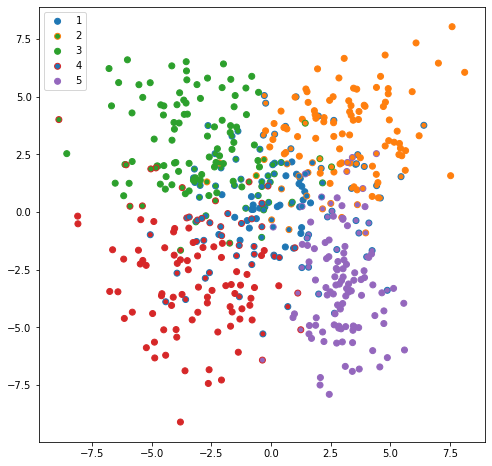

In [4]:
bagging = BaggingModel()
bagging.nb_models=9
bagging.test_bagging_kppv_model(split_data_tp3_app, split_data_tp3_dec, k=36)
bagging.compute_bagging_results()
bagging.print_model_result()
bagging.plot_test_data()

Contrairement au bagging de la séparation linéaire, le bagging du kppv ne permet pas d'améliorer le taux de classification. Cependant pour tester le bagging à son plein potential il faudrait faire un bagging avec plusieurs classifieur.

# Conclusion
Comme l'indique le tableau du taux de classification, quelque soit le modèle de classification les résultats sont similaire. En revanche quelques classifieurs ne sont pas autant performant tel que le 1ppv ou la séparation linéaire. 

||Dataset 1|Dataset 2|Dataset 3|
|----|-----|-----|-----|
|estimation gaussienne (euclidienne)| 99,2% | 94,6% | 72,8% |
|estimation gaussienne (mahalanobis)| 99,2% | 94,6% | 72,8% |
|estimation gaussienne (scikit learn)| 99,6% | 95,2% | 71% |
|1ppv| 99,2% | 92% | 64,6% |
|kppv (unanimité)| 99,2% | 63,2% | 24,2% |
|kppv (majorité)| 99,6% | 95% | 71% |
|kppv (scikit learn)| 99,2% | 94,8% | 71,2% |
|Parzen (uniform)| 99,2% | 95% | 71,4% |
|Parzen (gaussienne)| 99,2% | 94,8% | 72,6% |
|Parzen (scikit learn)| 99,4% | 94,6% | 68,6% |
|Spéaration linéaire (one vs one)| 99,4% | 81,4% | 55,2% |
|Spéaration linéaire (one vs all)| 84,2% | 67%% | 35,5% |
|Spéaration linéaire (scikit learn)| 99,4% | 93,4% | 71,2% |
|Bagging (séparation linéaire)| 99,6% | 95,2% | 67,8%|
|Bagging (kppv)| 99,2% | 95,4% | 71,4% |
|Bagging (scikit learn)| 99,4% | 93,4% | 71,2% |